# WikiNetworking Stallion Demo

### Introduction

This notebook creates both interactive and high resolution graphs of social networks from Wikipedia articles. Several demonstration data sets are included.

### Getting started

Run the cell below first. It will install the necessary packages and define a helper function and some variables for sample data URLs.

In [2]:
!pip install git+https://github.com/jchuahtacc/WikiNetworking.git
    
# Just in case we don't want to re-run the crawl, we will load the data directly
import wikinetworking as wn
import networkx as nx
import matplotlib.pyplot as plt
import urllib2
import json
%matplotlib inline

bet_hiphop_directed = "https://raw.githubusercontent.com/jchuahtacc/WikiNetworking/master/lessons/bet_directed.json"
bet_hiphop_undirected = "https://raw.githubusercontent.com/jchuahtacc/WikiNetworking/master/lessons/bet_undirected.json"
forbes_400 = "https://raw.githubusercontent.com/jchuahtacc/WikiNetworking/master/lessons/forbes400.json"
nba_allstars = "https://raw.githubusercontent.com/jchuahtacc/WikiNetworking/master/lessons/nba_allstars.json"
nfl_most_games = "https://raw.githubusercontent.com/jchuahtacc/WikiNetworking/master/lessons/nfl_players.json"
marvel_cinematic_universe = "https://raw.githubusercontent.com/jchuahtacc/WikiNetworking/master/lessons/mcu_network.json"

def make_graph(url, minimum_weight=2):
    graph_data = json.loads(urllib2.urlopen(url).read())
    return wn.create_graph(graph_data, minimum_weight=minimum_weight)

  Cloning https://github.com/jchuahtacc/WikiNetworking.git to /private/var/folders/dj/hf75r7l54zdgjfxn25jlqv6m0000gn/T/pip-_BSqAc-build


### Creating a graph and a layout

The `make_graph` function loads a URL that contains our graph data and creates a `networkx` graph. You may optionally specify a `minimum_weight` for links between nodes to be registered on our graph. Once we have the graph, we also need to use a layout algorithm to generate the position of the nodes. Possible layouts include:

- `circular_layout`
- `random_layout`
- `shell_layout`
- `spring_layout`
- `spectral_layout`
- `fruchterman_reingold_layout`

In [3]:
# Make a graph object (optionally, specify minimum_weight)
graph = make_graph(marvel_cinematic_universe, minimum_weight=3)

# Generate a layout object
layout = nx.spring_layout(graph)

### Create a small, interactive graph

Now we can create a small graph using embedded HTML. You may optionally specify a [`matplotlib` color map](https://matplotlib.org/examples/color/colormaps_reference.html) and a `node_size_factor`.

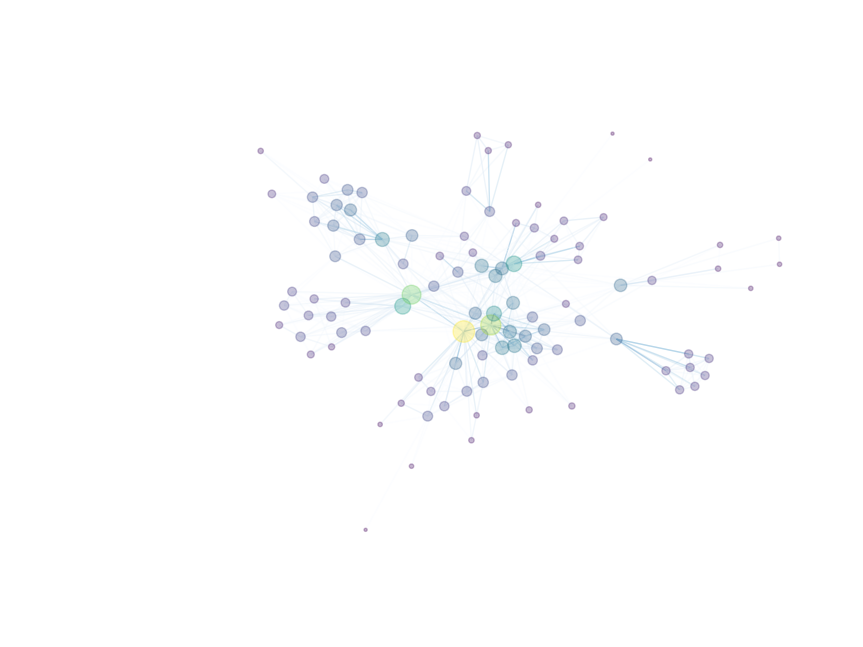

In [4]:
graph_html = wn.make_interactive_graph(graph, pos=layout, cmap=plt.cm.viridis, edge_cmap=plt.cm.Blues, node_size_factor=5)

### Save an extremely high resolution graph for a Massive Pixel Environment

This will take some time to run. You may specify your color maps, font sizes and node sizes here as well. Remember - what looks good on a small interactive screen may not work well on a display like [TACC's Stallion](https://www.tacc.utexas.edu/vislab/stallion)

In [7]:
wn.save_big_graph(graph, 
                  pos=layout, 
                  cmap=plt.cm.viridis, 
                  edge_cmap=plt.cm.Blues, 
                  width=3, 
                  height=15, 
                  dpi=1600, 
                  font_size=1, 
                  node_size_factor=5, 
                  output_file="mcu_network.png")

print("OK")

Rendering hi-resolution image...
Saving hi-resolution image to mcu_network.png...
OK


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
